## India-Ml-Hiring-Hackathon:

In [1]:
# To handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

In [2]:
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [3]:
# Import data 
df_train = pd.read_csv('train.csv') 
df_test = pd.read_csv('test.csv')
df_train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [4]:
# rows and columns of the data
print(df_train.shape)
print(df_test.shape)

(116058, 29)
(35866, 28)


In [5]:
df_train = df_train.drop(["financial_institution","loan_id","origination_date","first_payment_date"],axis=1)
df_test = df_test.drop(["financial_institution","loan_id","origination_date","first_payment_date"],axis=1)

In [6]:
df_train.head()

,source,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,Z,4.250,214000,360,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,Y,4.875,144000,360,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,Z,3.250,366000,180,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,X,4.750,135000,360,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,X,4.750,124000,360,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [7]:
# rows and columns of the data
print(df_train.shape)
print(df_test.shape)

(116058, 25)
(35866, 24)


In [8]:
# One hot encoding
df_train=pd.get_dummies(df_train, prefix=['source','loan_purpose',],drop_first=True)
df_test=pd.get_dummies(df_test, prefix=['source','loan_purpose',],drop_first=True)

In [9]:
df_train.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,source_Y,source_Z,loan_purpose_B12,loan_purpose_C86
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,0,0,0,1


In [10]:
# rows and columns of the data
print(df_train.shape)
print(df_test.shape)

(116058, 27)
(35866, 26)


In [11]:
# # Make dummy variables for rank
# data = pd.concat([df, pd.get_dummies(df['source'], prefix='source',drop_first=True)], axis=1)
# data = data.drop('source', axis=1)
# data.head()

In [12]:
# split into features ans Labels
X = df_train.drop(['m13'],axis=1).values
y = df_train['m13'].values


In [13]:
df_test=df_test.values

## Sampling:
Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set (i.e. the ratio between the different classes/categories represented). These terms are used both in statistical sampling, survey design methodology and in machine learning.

## Over Sampling:
SMOTE:
you can install it by the command `pip install -U imbalanced-learn`

In [14]:
from imblearn.over_sampling import SMOTE
X,y=SMOTE().fit_sample(X,y)

C:\Users\Manish Garg\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

## Random Forest:

In [16]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
y_pred = random_forest.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [18]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[34481,    35],
       [  117, 34621]], dtype=int64)

In [19]:
# Accuracy:
random_forest.score(X_test,y_test)


0.9978051809281774

In [20]:
from sklearn.metrics import classification_report,f1_score
f1_score(y_test, y_pred,average="binary")

0.9978096088999048

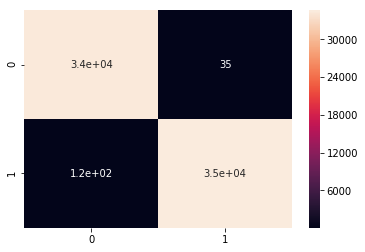

In [21]:
# heatmap
import seaborn
seaborn.heatmap(cnf_matrix,annot=True)

## Sample Submission:

In [22]:
sample=random_forest.predict(df_test)

In [23]:
sample = pd.DataFrame(data=sample)
sample[0].value_counts()

0    35759
1      107
Name: 0, dtype: int64

In [24]:
test=pd.read_csv('Downloads/India Hackathon/test.csv')



In [25]:
loan_id=test["loan_id"]

In [26]:
data = pd.concat([loan_id,sample], axis=1)

In [27]:
data=data.rename(columns={0:"m13"})

In [28]:
data.to_csv('Downloads/sample1.csv')

## Great!!😍